In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

df = pd.read_csv('Admission_Predict.csv')
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()

In [43]:
X = df.loc[:,'gre_score':'research']
y = df['chance_of_admit']

In [45]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Making object decision tree Regressor
decision_tree = DecisionTreeRegressor(max_depth=3, ccp_alpha=0.001)

# fitting model
decision_tree.fit(X_train, y_train)

# predicting
y_pred = decision_tree.predict(X_test)

# score of the model decision tree regressor
print(decision_tree.score(X_test, y_test))

0.5230242793515552


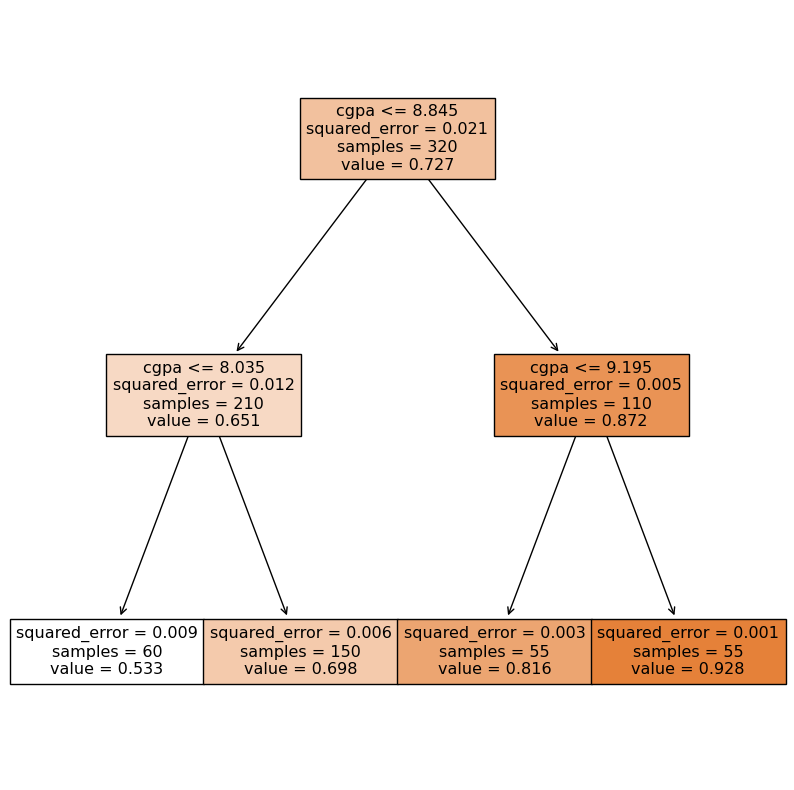

In [46]:
plt.figure(figsize=(10, 10))
tree.plot_tree(decision_tree, feature_names= X_train.columns,max_depth=2, filled=True);

In [48]:
def mse(data):
    """Calculate the MSE of a dataset"""
    return np.mean((data-data.mean())**2)

def mse_gain(left, right, current_mse):
    """Information Gain (MSE) associated with creating a node / split data based on MSE.
    Input: left, right are data in left branch, right branch, respectively
    current_impurity is the data impurity before splitting into left, right branches"""
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_mse - w * mse(left) - (1-w) * mse(right)

m = mse(y_train)
print(f'MSE at root: {round(m,3)}')

mse_gain_list = []
for i in X_train.cgpa.unique():
    left = y_train[X_train.cgpa<=i]
    right = y_train[X_train.cgpa>i]
    mse_gain_list.append([i, mse_gain(left, right, m)])

mse_table = pd.DataFrame(mse_gain_list, columns=['split_value','info_gain']).sort_values('info_gain', ascending=False)
print(mse_table.head(10))

MSE at root: 0.021
     split_value  info_gain
10          8.84   0.011065
96          8.80   0.011037
98          8.83   0.011023
124         8.85   0.010985
125         8.73   0.010939
110         8.87   0.010932
139         8.88   0.010895
1           8.70   0.010894
17          8.76   0.010858
140         8.74   0.010850


Text(0, 0.5, 'info gain')

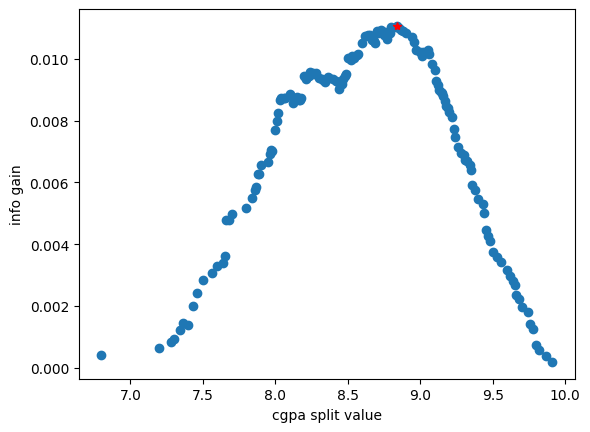

In [49]:
plt.plot(mse_table['split_value'], mse_table['info_gain'],'o')
plt.plot(mse_table['split_value'].iloc[0], mse_table['info_gain'].iloc[0],'r*')
plt.xlabel('cgpa split value')
plt.ylabel('info gain')

In [50]:
np.unique(decision_tree.predict(X_train))

array([0.53283333, 0.6976    , 0.81618182, 0.92781818])